## Pearson相关性分析
#### 适用条件：
- 两变量均为连续变量。
- 两变量应当是配对的，即来源于同一个个体。
- 两变量之间存在线性关系，通常绘制散点图检验。
- 两变量没有明显的异常值，通常绘制箱线图检验。异常值会对相关性分析的结果造成很大影响，如果存在异常值，应修改为正确值或进行变换去除，并在报告中指出。
- 两变量呈双变量正态分布或近似正态分布，通常绘制Q-Q图或进行正态性检验。
#### Pearson相关系数
- Pearson相关系数，又称积差相关系数，是表达两变量线性相关程度及方向的统计指标。
$$r=\frac{\sum (X-\bar{X})(Y-\bar{Y})}{\sqrt{\sum (X-\bar{X})^2\sum (Y-\bar{Y})^2}}=\frac{l_{XY}}{\sqrt{l_{XX}l_{YY}}}$$
- 其中：
    - $l_{XX}=(X-\bar{X})^2=\sum X^2-\frac{(\sum X)^2}{n},\text{表示}X\text{的离均差平方和}$
    - $l_{YY}=(Y-\bar{Y})^2=\sum Y^2-\frac{(\sum Y)^2}{n},\text{表示}Y\text{的离均差平方和}$
    - $l_{XY}=\sum (X-\bar{X})(Y-\bar{Y})=\sum XY-\frac{(\sum X)(\sum Y)}{n},\text{表示}X\text{与}Y\text{的离均差平方和}$
- 相关系数的取值范围为$-1≤r≤1$。相关系数小于0为负相关，大于0为正相关，等于0表示不存在相关。
- 相关系数的绝对值越大，表示两变量间的相关程度越密切。
- 要确定是否存在线性关系，研究者需要查看两个变量的散点图，如果散点图大致呈一条直线，说明有线性关系，如果不是一条直线则没有线性关系。

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 支持显示中文
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus']=False
sns.set(font='Heiti TC')

%matplotlib inline

In [2]:
data = pd.read_excel('eighth_girl.xlsx')
data.head()

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
0,155,51,1687,9.7,158,9.3
1,158,52,1868,9.3,162,9.6
2,160,59,1958,9.9,178,9.5
3,163,59,1756,9.7,183,10.1
4,165,60,1575,9.0,156,10.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   身高      591 non-null    int64  
 1   体重      591 non-null    int64  
 2   肺活量     591 non-null    int64  
 3   50米跑    591 non-null    float64
 4   立定跳远    591 non-null    int64  
 5   坐位体前屈   591 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 27.8 KB


#### 统计信息

In [4]:
dsc = data.describe()
dsc

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,156.003384,46.783418,2333.233503,10.792014,166.825719,9.496616
std,7.389410,5.031473,350.436154,1.310873,16.813587,2.938186
min,135.000000,16.000000,1450.000000,7.800000,52.000000,0.500000
25%,151.000000,44.000000,2109.000000,9.800000,156.000000,7.800000
50%,157.000000,47.000000,2391.000000,10.700000,167.000000,9.600000
75%,161.000000,50.000000,2570.000000,11.500000,178.000000,11.600000
max,171.000000,65.000000,3272.000000,15.000000,205.000000,17.500000


#### 相关系数矩阵图

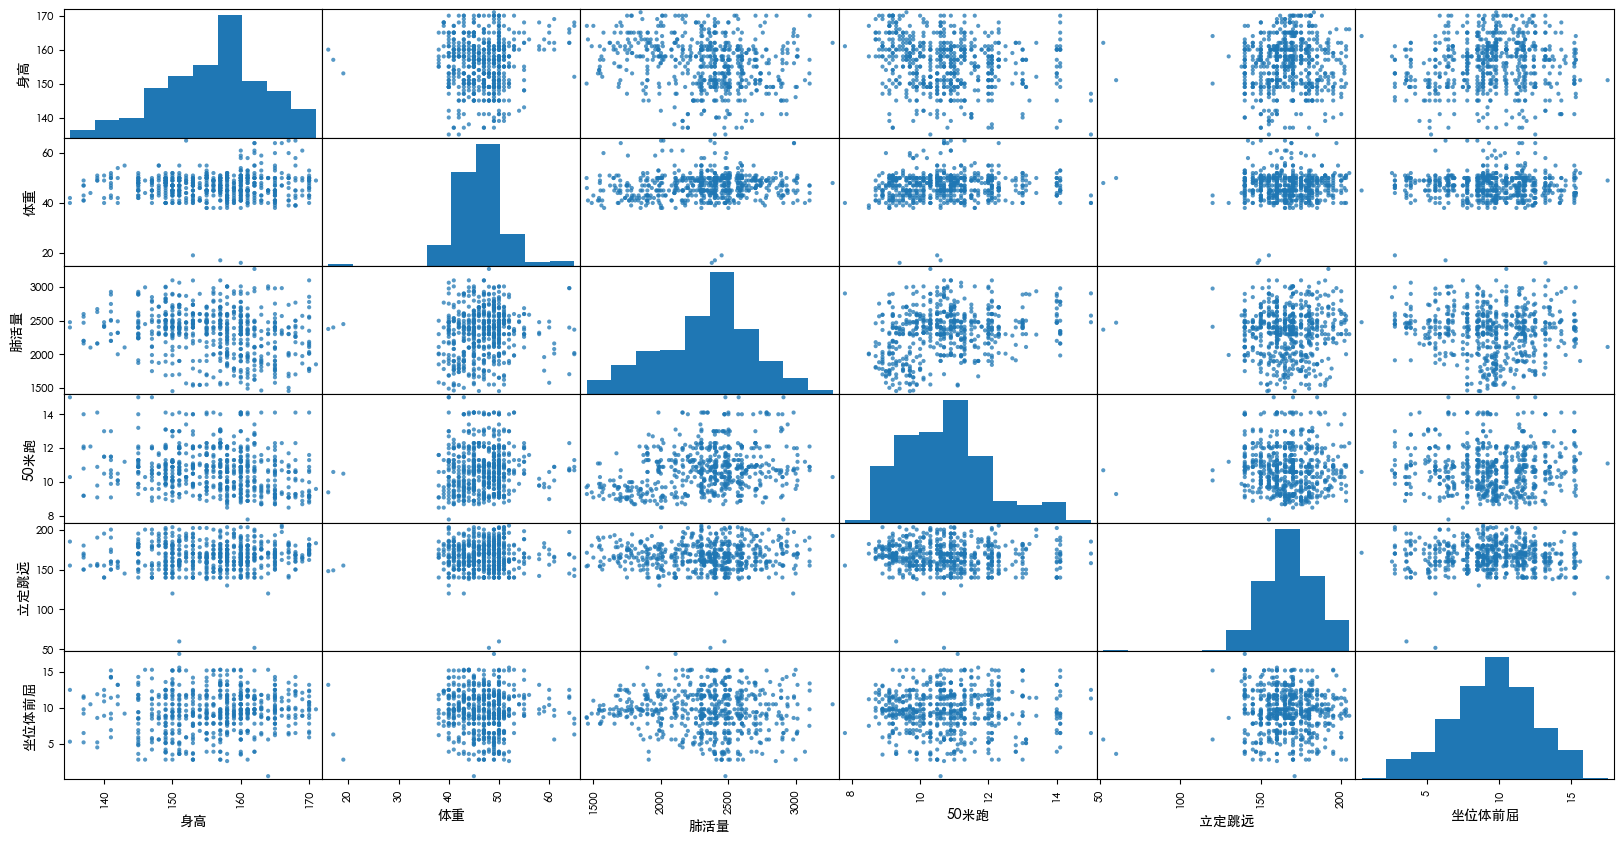

In [5]:
pd.plotting.scatter_matrix(data, figsize=(20,10), alpha=0.75)
plt.show()

#### 相关系数矩阵

In [6]:
cor = data.corr(method='pearson')
cor

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.066531,-0.217663,-0.192002,0.043973,0.095069
体重,0.066531,1.000000,0.095375,0.068540,0.027943,-0.016089
肺活量,-0.217663,0.095375,1.000000,0.289751,0.024827,-0.074931
50米跑,-0.192002,0.068540,0.289751,1.000000,-0.058681,-0.001876
立定跳远,0.043973,0.027943,0.024827,-0.058681,1.000000,-0.017407
坐位体前屈,0.095069,-0.016089,-0.074931,-0.001876,-0.017407,1.000000


#### 可视化矩阵

<Axes: >

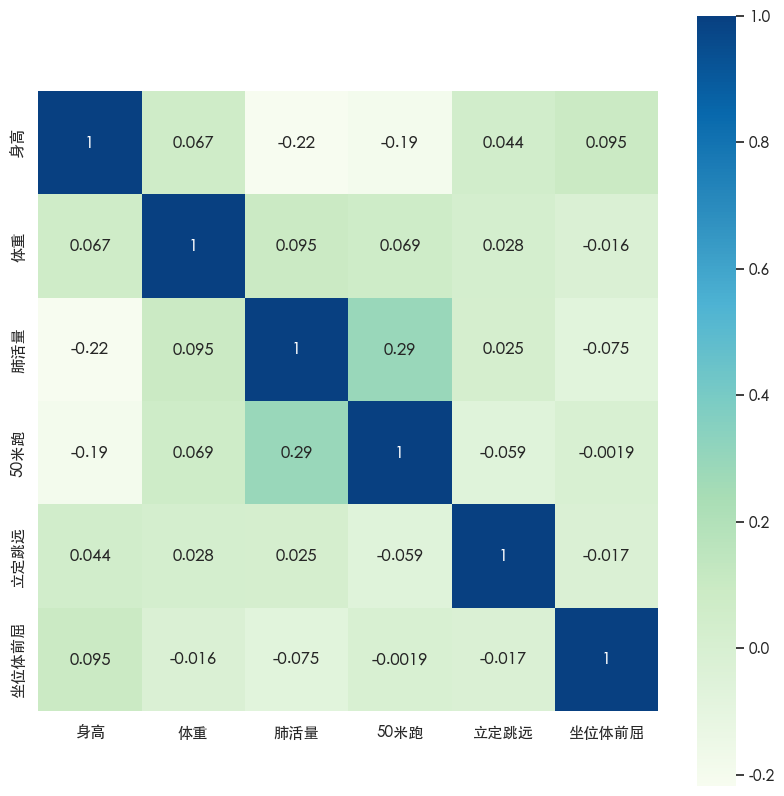

In [8]:
fig, ax = plt.subplots(figsize = (10,10))

# cor：相关系数矩阵
# cmap：颜色
# xticklabels：显示x轴标签
# yticklabels：显示y轴标签
# annot：方块中显示数据
# square：方块为正方形
sns.heatmap(cor, cmap='GnBu', xticklabels=True, yticklabels=True, annot=True, square=True)

In [9]:
from scipy import stats
np.set_printoptions(suppress=True)  # 不使用用科学计数法
pd.set_option('display.float_format',lambda x : '%.4f' % x)  # 保留小数点后4位有效数字

In [10]:
# 0.975分位数
tp = stats.t.isf(1-0.975, 28)

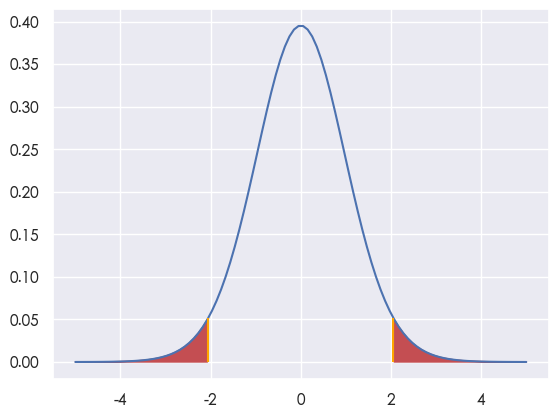

In [11]:
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, 28)
plt.plot(x,y)
plt.vlines(-tp, 0, stats.t.pdf(-tp, 28), colors='orange')
plt.vlines(tp, 0, stats.t.pdf(tp, 28), colors='orange')
plt.fill_between(x, 0, y, where=abs(x)>tp, interpolate=True, color='r')

In [12]:
# 自定义求解p值矩阵的函数
def my_pvalue_pearson(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.pearsonr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_pearson.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_pearson.csv', index_col=0)
    return p_val

In [13]:
my_pvalue_pearson(data)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.0000,0.1061,0.0000,0.0000,0.2859,0.0208
体重,0.1061,0.0000,0.0204,0.0960,0.4978,0.6963
肺活量,0.0000,0.0204,0.0000,0.0000,0.5469,0.0687
50米跑,0.0000,0.0960,0.0000,0.0000,0.1542,0.9637
立定跳远,0.2859,0.4978,0.5469,0.1542,0.0000,0.6728
坐位体前屈,0.0208,0.6963,0.0687,0.9637,0.6728,0.0000
